# Autoencoders and [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning)

First, a brief introduction to unsupervised learning, notes available [here](./DSCI6003-5.4-Lecture.pdf). Also see the valuable scikit-learn page for [clustering](http://scikit-learn.org/stable/modules/clustering.html)

If supervised learning is learning the conditional distribution of $y$ dependent on a function $x, \theta$ $p(y|x,\theta)$

<center><img src="images/tiger_supervised.png" height="200"/></center>

we can think about unsupervised learning as learning the unconditional distribution $p(x|\theta)$ from the creation of a generative function $\theta$. 

<center><img src="images/tiger_autoencoder.png" height="200"/></center>

## Autoencoders

"Autoencoding" is a data compression algorithm where the compression and decompression functions are

1) data-specific: they will only be able to compress data similar to what they have been trained on.
2) lossy:  which means that the decompressed outputs will be degraded compared to the original inputs
3) unsupervised: it is easy to train specialized instances of the algorithm that will perform well on a specific type of input.

Almost everywhere the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.  In 2012 they briefly found an application in [pretraining for deep convolutional neural networks](http://www.jmlr.org/papers/volume11/erhan10a/erhan10a.pdf), but this quickly fell out of fashion as better random weight initialization schemes were found to be sufficient for training deep networks from scratch. In 2014, [batch normalization](https://arxiv.org/pdf/1502.03167.pdf) started allowing for even deeper networks, and from late 2015 we could train arbitrarily deep networks from scratch using [residual learning](https://arxiv.org/pdf/1512.03385.pdf). These days autoencoders are rarely a standalone tool, especially due to the fact that there are often much better tools (MP3) for specific tasks.  


### What are autoencoders good for?

1) Data Denoising

2) Dimensionality reduction for data visualization. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques.

For 2D visualization specifically, t-SNE is probably the best algorithm around, but it typically requires relatively low-dimensional data. So a good strategy for visualizing similarity relationships in high-dimensional data is to start by using an autoencoder to compress your data into a low-dimensional space (e.g. 32 dimensional), then use t-SNE for mapping the compressed data to a 2D plane. Note that a nice parametric implementation of t-SNE in Keras was developed by Kyle McDonald and is available on Github. Otherwise scikit-learn also has a [simple and practical implementation you can unpack and use](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

## Autoencoder architecture

<center><img src="images/w2v_neural_net.png" height="300"/></center>

You just learned an autoencoder...what was it?

In [18]:
from keras.layers import Input, Dense
from keras.models import Model


input_dim =784
encoding_dim = 32

# this is the size of our encoded representations

input_layer = Input(shape=(input_dim, )) # this is our input placeholder

encoder1 = Dense(encoding_dim, activation="sigmoid")(input_layer) # try changing the activations inside the encoder
encoder2 = Dense(int(encoding_dim / 2), activation="relu")(encoder1)

# you can also add more squeezing layers here

decoder2 = Dense(int(encoding_dim / 2), activation='relu')(encoder2)
decoder1 = Dense(input_dim, activation='sigmoid')(decoder2)

autoencoder = Model(inputs=input_layer, outputs=decoder1)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.3804 - val_loss: 0.2642
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.2630 - val_loss: 0.2613
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.2601 - val_loss: 0.2583
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.2572 - val_loss: 0.2557
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.2546 - val_loss: 0.2531
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.2515 - val_loss: 0.2491
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.2468 - val_loss: 0.2442
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.2431 - val_loss: 0.2416
Epoch 9/10
60000/60000 [==============================] - 3s - loss: 0.2412 - val_loss: 0.2400
Epoch 10/10
60000/60000 [==============================] - 3s - loss:

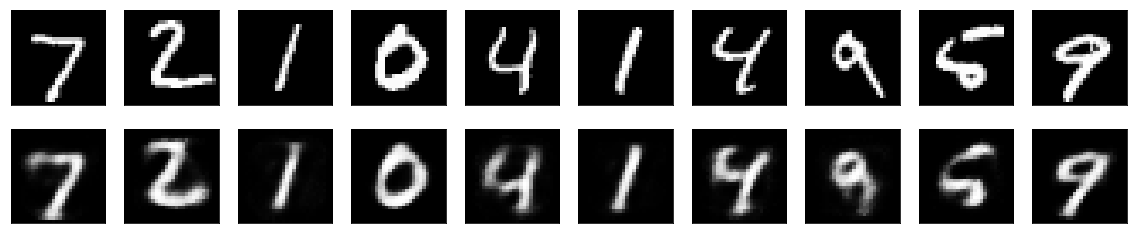

In [20]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Denoising with Autoencoders

This is an obvious application of Autoencoders, really, simply using the layer properties as a filter for strong signal. Not much to it, really.

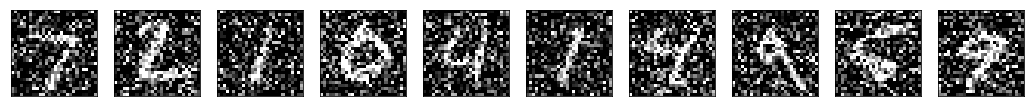

In [23]:
## Let's generate some noisy digits

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n+1, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) # shorthand for matching padding to the 32
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 95s - loss: 0.2045 - val_loss: 0.1382
Epoch 2/2
60000/60000 [==============================] - 93s - loss: 0.1241 - val_loss: 0.1166


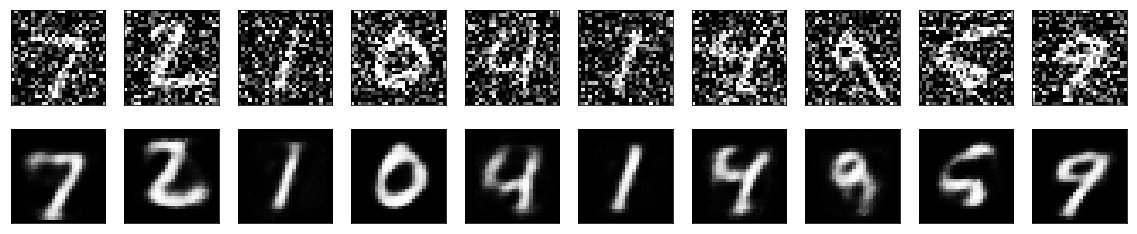

In [28]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dimensionality Reduction with Autoencoders

This is another obvious application of Autoencoders. In fact, it's one of the most powerful because of its generality and ease of application. Every data scientist needs to do dimensionality reduction once in a [while](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).

It has been shown that if there is one linear hidden layer and the mean squared error criterion is used to train the network, then the k hidden units learn to project the input are in the span of the first k principal components of the data. If the hidden layer is non-linear the compression is more useful, capturing multimodal aspects.

For this reason, one way to evaluate an autoencoder efficacy in dimensionality reduction is cutting the output of the middle hidden layer and compare the accuracy/performance of your desired algorithm by this reduced data rather than using original data. Generally, PCA is a linear method, while autoencoders are usually non-linear. 

In [58]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np

num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1 # MNIST images are 28x28
num_classes = 10 # there are 10 classes (1 per digit)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

x_train /= 255 # Normalise data to [0, 1] range
x_test /= 255 # Normalise data to [0, 1] range

y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img)

encoded = Dense(height * width//2, activation='relu')(x)
encoded = Dense(height * width//8, activation='relu')(encoded)

y = Dense(height * width//256, activation='relu')(x) # Has 28**2/256 = 3 columns! Can you get similar performance with 
                                                    # a smaller filter

decoded = Dense(height * width//8, activation='relu')(y)
decoded = Dense(height * width//2, activation='relu')(decoded)

z = Dense(height * width, activation='sigmoid')(decoded)
model = Model(input_img, z)

model.compile(optimizer='adadelta', loss='mse') # reporting the accuracy

model.fit(x_train, x_train,
      epochs=2,
      batch_size=128,
      shuffle=True,
      validation_data=(x_test, x_test))

mid = Model(input_img, y)
reduced_representation =mid.predict(x_test)

out = Dense(num_classes, activation='softmax')(y)
reduced = Model(input_img, out)
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

reduced.fit(x_train, y_train,
      epochs=2,
      batch_size=128,
      shuffle=True,
      validation_data=(x_test, y_test))


scores = reduced.evaluate(x_test, y_test, verbose=1) 
print("Accuracy: ", scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 13s - loss: 0.1039 - val_loss: 0.0686
Epoch 2/2
60000/60000 [==============================] - 12s - loss: 0.0675 - val_loss: 0.0667
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s - loss: 1.9809 - acc: 0.1871 - val_loss: 1.8308 - val_acc: 0.1987
Epoch 2/2
 9504/10000 [===========================>..] - ETA: 0sAccuracy:  0.6615


### we can have a look at the reduced representation here. Note that the reduced dimensions group around centroids - they are not all exactly equivalent.

In [57]:
for i in range(15):
    print("{}:{}".format(np.argmax(y_test[i]),reduced_representation[i]))

7:[ 8.30024052  0.          0.        ]
2:[ 3.02950644  0.          7.29817486]
1:[ 13.94163418   0.          10.4308157 ]
0:[ 1.09490204  0.          0.8291322 ]
4:[ 2.94454598  0.          0.        ]
1:[ 16.96165657   0.          13.17432785]
4:[ 5.50058651  0.          0.96418548]
9:[ 6.02065086  0.          2.1845355 ]
5:[ 3.2124176   0.          2.15437007]
9:[ 6.81787205  0.          0.20129123]
0:[ 0.57817101  0.          3.19029284]
6:[ 1.47930455  0.          1.94906747]
9:[ 8.69255066  0.          0.        ]
0:[ 1.10360217  0.          1.25638664]
1:[ 18.23989677   0.          11.01593781]
